<a href="https://colab.research.google.com/github/chuangchai49097/DWDM21/blob/main/MiniExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ข้อสอบ

จาก data ```flights.csv``` และ ```airports.csv``` ใน https://drive.google.com/drive/folders/1EFo1_uQgWkRiXjezL0T4YwteYrsqU5MV?usp=sharing
0. หารัฐที่มีจำนวนเครื่องบินขาเข้ามากที่สุดและน้อยที่สุด
1. หารัฐที่มีจำนวนเครื่องบินขาออกมากที่สุดและน้อยที่สุด
2. วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์
3. สายการบินไหนมีเที่ยวบินมากที่สุดและน้อยที่สุด
4. สายการบินอะไรมีความล่าช้ามากที่สุดและน้อยที่สุด
5. วันธรรมดาหรือวันเสาร์อาทิตย์(วันจันทร์ = 1)มีเครื่องบินขาเข้ามากกว่ากัน

ให้นักศึกษาทำข้อสอบ 2 ข้อจากที่แสดงข้างบนโดยกรอกรหัสนักศึกษาลงใน function ```gen_exams()``` แล้ว run เพื่อให้ได้ข้อสอบที่นักศึกษาต้องทำ 2 ข้อ (ข้อละ 3 คะแนน)
และให้นักศึกษาคิดโจทย์เองอีก 1 ข้อ (4 คะแนน)


In [59]:
import pandas as pd

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import os

In [62]:
path = '/content/drive/My Drive/DWDM2021_DATA'
flights = pd.read_csv(os.path.join(path, 'flights.csv'))
flights

,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,19,5,DL,11433,13303,-3,1
1,19,5,DL,14869,12478,0,-8
2,19,5,DL,14057,14869,-4,-15
3,19,5,DL,15016,11433,28,24
4,19,5,DL,11193,12892,-6,-11
...,...,...,...,...,...,...,...
2702213,19,6,DL,13204,14869,1,-3
2702214,19,6,DL,10397,13495,-2,-3
2702215,19,6,DL,10140,10397,18,9
2702216,19,6,DL,10397,13244,10,7


In [63]:
airports = pd.read_csv('/content/drive/My Drive/DWDM2021_DATA/airports.csv')
airports

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport
...,...,...,...,...
360,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field
361,11097,Cody,WY,Yellowstone Regional
362,11865,Gillette,WY,Gillette Campbell County
363,12441,Jackson,WY,Jackson Hole


In [64]:
def gen_exams(ID):
    import math
    a = int(ID[-1])%6
    b = int(ID[-1])%3
    print(f'รหัสนักศึกษา {ID} ทำข้อ {a} และ {b if a != b else 5-b}')

ตัวอย่างการ run

In [65]:
gen_exams('623020519-5')

รหัสนักศึกษา 623020519-5 ทำข้อ 5 และ 2


##2 วาด Histogram แสดงจำนวนเครื่องบินขาออกของแต่ละวันในสัปดาห์

In [72]:
import numpy as np
from matplotlib import pyplot as plt

In [73]:
data_flights = flights.groupby('วันในสัปดาห์')[['รหัสสนามบินต้นทาง']].count() #ใช้จัดกลุ่มโดยให้ รหัสสนามบินต้นทาง
data_flights

,รหัสสนามบินต้นทาง
วันในสัปดาห์,
1,407837
2,397594
3,403072
4,406563
5,396387
6,318537
7,372228


In [75]:
data_flights.reset_index(inplace=True) #reset index
data_flights

,วันในสัปดาห์,รหัสสนามบินต้นทาง
0,1,407837
1,2,397594
2,3,403072
3,4,406563
4,5,396387
5,6,318537
6,7,372228


([<matplotlib.axis.XTick at 0x7fded2519b50>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7')])

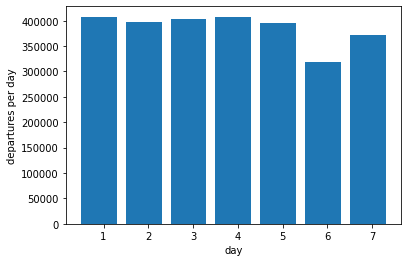

In [85]:
##plot กราฟ
plt.bar(np.arange(len(data_flights.iloc[:,1])), data_flights.iloc[:,1])
plt.xlabel('day')
plt.ylabel('departures per day')
plt.xticks(np.arange(len(data_flights.iloc[:,0]))+0.1, data_flights.iloc[:,0])
plt

###โจทย์กำหนดเอง - วันจันทร์-ศุกร์ มีเครื่องบินขาออกของรัฐไหนมากที่สุด


In [86]:
merged_table = airports.merge(flights,how='left',left_on='รหัสสนามบิน',right_on='รหัสสนามบินปลายทาง')
merged_table

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,10165,Adak Island,AK,Adak,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10299,Anchorage,AK,Ted Stevens Anchorage International,18.0,4.0,DL,14869.0,10299.0,21.0,23.0
2,10299,Anchorage,AK,Ted Stevens Anchorage International,19.0,5.0,DL,14869.0,10299.0,-1.0,7.0
3,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,13487.0,10299.0,-4.0,-4.0
4,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,13487.0,10299.0,13.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
2702508,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702509,11097,Cody,WY,Yellowstone Regional,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702510,11865,Gillette,WY,Gillette Campbell County,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702511,12441,Jackson,WY,Jackson Hole,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
merged_table.isnull().any() #หาข้อมูล missing

รหัสสนามบิน           False
เมือง                 False
รัฐ                   False
ชื่อสนามบิน           False
วันในเดือน             True
วันในสัปดาห์           True
สายการบิน              True
รหัสสนามบินต้นทาง      True
รหัสสนามบินปลายทาง     True
ความล่าช้าขาออก        True
ความล่าช้าขาเข้า       True
dtype: bool

In [88]:
merged_table_dropna = merged_table.dropna()
merged_table_dropna

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
1,10299,Anchorage,AK,Ted Stevens Anchorage International,18.0,4.0,DL,14869.0,10299.0,21.0,23.0
2,10299,Anchorage,AK,Ted Stevens Anchorage International,19.0,5.0,DL,14869.0,10299.0,-1.0,7.0
3,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,13487.0,10299.0,-4.0,-4.0
4,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,13487.0,10299.0,13.0,10.0
5,10299,Anchorage,AK,Ted Stevens Anchorage International,17.0,3.0,DL,14869.0,10299.0,24.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...
2702496,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,10397.0,13342.0,20.0,5.0
2702497,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,10397.0,13342.0,11.0,17.0
2702498,13342,Milwaukee,WI,General Mitchell International,17.0,4.0,DL,13487.0,13342.0,-2.0,-6.0
2702499,13342,Milwaukee,WI,General Mitchell International,18.0,5.0,DL,13487.0,13342.0,-5.0,0.0


In [94]:
merged_table

,รหัสสนามบิน,เมือง,รัฐ,ชื่อสนามบิน,วันในเดือน,วันในสัปดาห์,สายการบิน,รหัสสนามบินต้นทาง,รหัสสนามบินปลายทาง,ความล่าช้าขาออก,ความล่าช้าขาเข้า
0,10165,Adak Island,AK,Adak,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10299,Anchorage,AK,Ted Stevens Anchorage International,18.0,4.0,DL,14869.0,10299.0,21.0,23.0
2,10299,Anchorage,AK,Ted Stevens Anchorage International,19.0,5.0,DL,14869.0,10299.0,-1.0,7.0
3,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,13487.0,10299.0,-4.0,-4.0
4,10299,Anchorage,AK,Ted Stevens Anchorage International,16.0,2.0,DL,13487.0,10299.0,13.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
2702508,11233,Cheyenne,WY,Cheyenne Regional/Jerry Olson Field,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702509,11097,Cody,WY,Yellowstone Regional,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702510,11865,Gillette,WY,Gillette Campbell County,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2702511,12441,Jackson,WY,Jackson Hole,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
state_dapartures = merge_table.groupby('รัฐ').count().sort_values(by=['รหัสสนามบินต้นทาง'],ascending=False)  
state_dapartures.iloc[:6,3:4]

NameError: ignored